In [1]:
import os
import urllib.request
import torch
import numpy as np
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
from anndata import AnnData
from sklearn.decomposition import PCA
import seaborn as sns
import hdf5plugin


In [2]:
adata = anndata.read_h5ad('output_data_finetune.h5ad')

In [3]:
cmap_name_counts = adata.obs['cmap_name_x'].value_counts()

In [12]:
adata.obs['pert_id'].value_counts()

pert_id
BRD-K60230970    7506
BRD-K50691590    6644
BRD-K81418486    1937
BRD-A75409952    1130
BRD-A79768653    1026
                 ... 
BRD-K04559718       1
BRD-K30379413       1
BRD-K81592842       1
BRD-K60030763       1
BRD-K38969544       1
Name: count, Length: 28193, dtype: int64

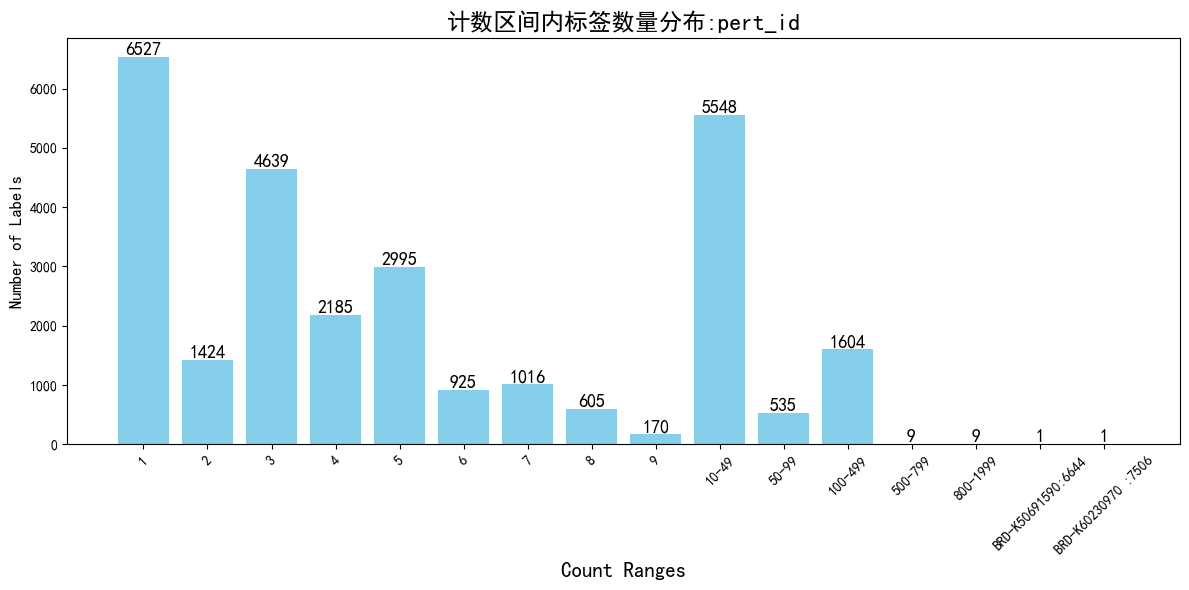

In [58]:

# 对 'cmap_name_x' 列进行统计
cmap_name_counts = adata.obs['pert_id'].value_counts()
# 定义区间
bins = [1, 2,3,4,5,6,7,8,9,10,50,100, 500, 800,2000,  6645,cmap_name_counts.max() + 1]  # 设定区间边界

# 使用 pandas 的 cut 函数将计数值分到区间
counts_binned = pd.cut(cmap_name_counts.values, bins=bins, right=False)

# 计算每个区间的计数
count_distribution = counts_binned.value_counts().sort_index()

# 动态生成标签
labels = [f"{int(bins[i])}-{int(bins[i + 1]) - 1}" for i in range(len(bins) - 1)]
labels = ['1', '2','3','4', '5','6','7','8','9','10-49','50-99','100-499', '500-799', '800-1999', 'BRD-K50691590:6644', 'BRD-K60230970 :7506']

# 设置图形尺寸
plt.figure(figsize=(12, 6))

# 绘制条形图
bars = plt.bar(labels, count_distribution.values, color='skyblue')

# 在每个柱上展示对应值
for bar in bars:
    yval = bar.get_height()  # 获取柱的高度
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=13)


# 添加标题和标签
plt.title('计数区间内标签数量分布:pert_id', fontsize=17)
plt.xlabel('Count Ranges', fontsize=15)
plt.ylabel('Number of Labels', fontsize=12)

# 显示图表
plt.xticks(rotation=45)  # 旋转 x 轴刻度标签以提高可读性
plt.tight_layout()
plt.show()

In [13]:
adata.obs['nearest_dose'].value_counts()

nearest_dose
10.000    157621
4.000      51634
1.110      36358
3.330      33449
0.370      32174
0.040      29164
0.125      24010
20.000     20382
0.080      19686
2.220      19289
0.010      18584
0.740      18001
0.250      17797
0.030      17621
0.120       9282
Name: count, dtype: int64

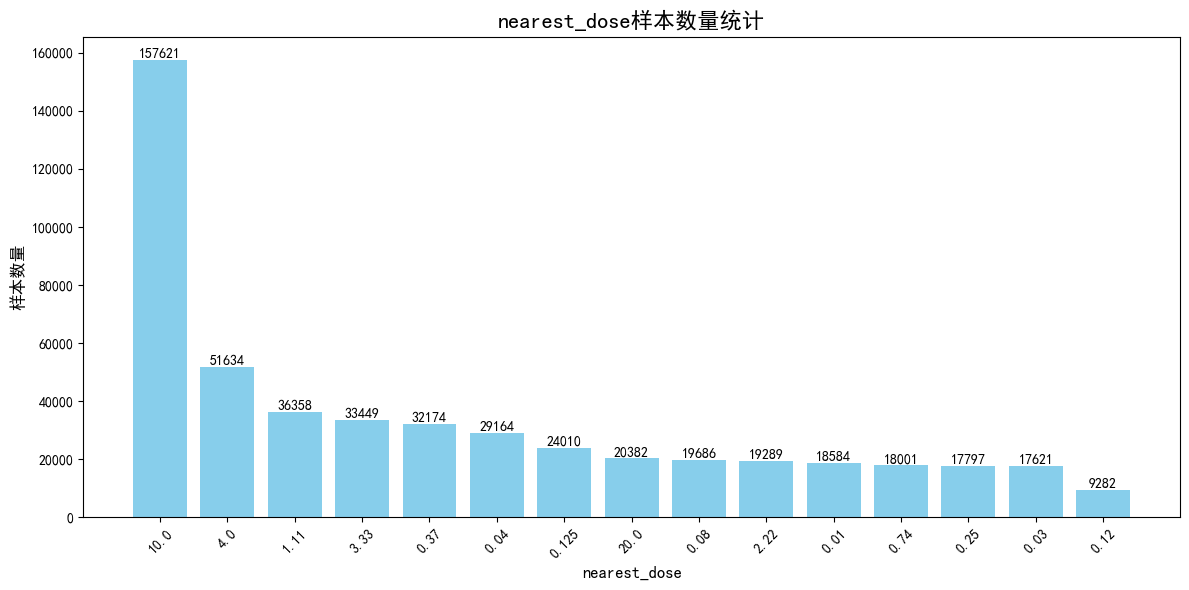

In [66]:
nearest_dose_counts = adata.obs['nearest_dose'].value_counts()

# 设置图形尺寸
plt.figure(figsize=(12, 6))

# 绘制条形图
bars = plt.bar(nearest_dose_counts.index.astype(str), nearest_dose_counts.values, color='skyblue')

# 在每个柱上展示对应值
for bar in bars:
    yval = bar.get_height()  # 获取柱的高度
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# 添加标题和标签
plt.title('nearest_dose样本数量统计', fontsize=16)  # 中文标题
plt.xlabel('nearest_dose', fontsize=12)  # 中文 X 轴名称
plt.ylabel('样本数量', fontsize=12)  # 中文 Y 轴名称

# 显示图表
plt.xticks(rotation=45)  # 旋转 x 轴刻度标签以提高可读性
plt.tight_layout()
plt.show()

In [15]:
adata.obs['pert_time'].value_counts()

pert_time
24.0    410795
6.0      94257
Name: count, dtype: int64

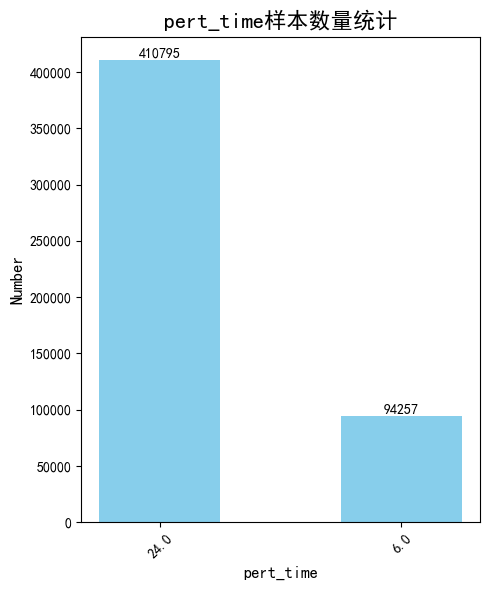

In [71]:
nearest_dose_counts = adata.obs['pert_time'].value_counts()

# 设置图形尺寸
plt.figure(figsize=(5, 6))

# 绘制条形图
bars = plt.bar(nearest_dose_counts.index.astype(str), nearest_dose_counts.values,width=0.5, color='skyblue')

# 在每个柱上展示对应值
for bar in bars:
    yval = bar.get_height()  # 获取柱的高度
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# 添加标题和标签
plt.title('pert_time样本数量统计', fontsize=16)  # 中文标题
plt.xlabel('pert_time', fontsize=12)  # 中文 X 轴名称
plt.ylabel('Number', fontsize=12)  # 中文 Y 轴名称

# 显示图表
plt.xticks(rotation=45)  # 旋转 x 轴刻度标签以提高可读性
plt.tight_layout()
plt.show()

In [38]:
adata.obs['cmap_name_x'].value_counts()

cmap_name_x
bortezomib       7618
MG-132           7506
vorinostat       1937
wortmannin       1213
sirolimus        1171
                 ... 
BRD-K41102088       1
BRD-K90882192       1
BRD-K90881556       1
BRD-K90879242       1
1-EBIO              1
Name: count, Length: 27447, dtype: int64

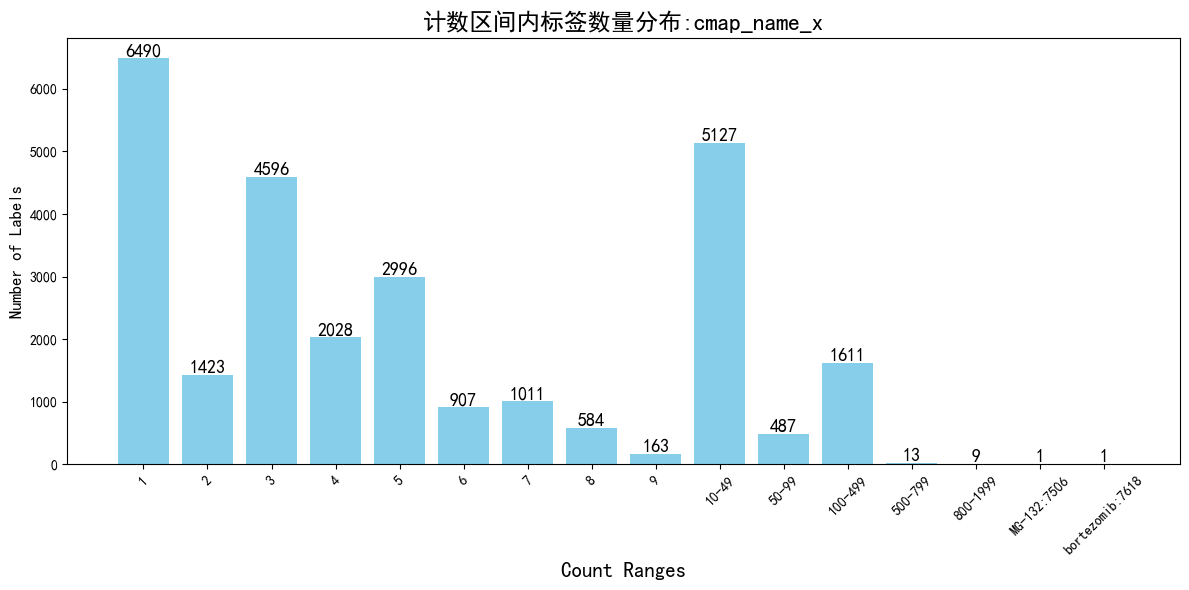

In [51]:

# 对 'cmap_name_x' 列进行统计
cmap_name_counts = adata.obs['cmap_name_x'].value_counts()
# 定义区间
bins = [1, 2,3,4,5,6,7,8,9,10,50,100, 500, 800,2000, 7607, cmap_name_counts.max() + 1]  # 设定区间边界

# 使用 pandas 的 cut 函数将计数值分到区间
counts_binned = pd.cut(cmap_name_counts.values, bins=bins, right=False)

# 计算每个区间的计数
count_distribution = counts_binned.value_counts().sort_index()

# 动态生成标签
labels = [f"{int(bins[i])}-{int(bins[i + 1]) - 1}" for i in range(len(bins) - 1)]
labels = ['1', '2','3','4', '5','6','7','8','9','10-49','50-99','100-499', '500-799', '800-1999', 'MG-132:7506', 'bortezomib:7618']

# 设置图形尺寸
plt.figure(figsize=(12, 6))

# 绘制条形图
bars = plt.bar(labels, count_distribution.values, color='skyblue')

# 在每个柱上展示对应值
for bar in bars:
    yval = bar.get_height()  # 获取柱的高度
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=13)


# 添加标题和标签
plt.title('计数区间内标签数量分布:cmap_name_x', fontsize=17)
plt.xlabel('Count Ranges', fontsize=15)
plt.ylabel('Number of Labels', fontsize=12)

# 显示图表
plt.xticks(rotation=45)  # 旋转 x 轴刻度标签以提高可读性
plt.tight_layout()
plt.show()

In [3]:
cell_iname = adata.obs['cell_iname'].value_counts()

In [4]:
adata.obs['cell_iname'].value_counts()

cell_iname
MCF7        57128
PC3         51836
A549        48461
A375        43319
HT29        40540
HA1E        35296
VCAP        34276
MCF10A      24179
YAPC        21265
HELA        21009
U2OS        19028
MDAMB231    17071
HEK293      15538
HCC515      14187
THP1        14033
JURKAT      13795
HEPG2       12596
NPC          9271
HUVEC        7622
XC.L10       4602
Name: count, dtype: int64

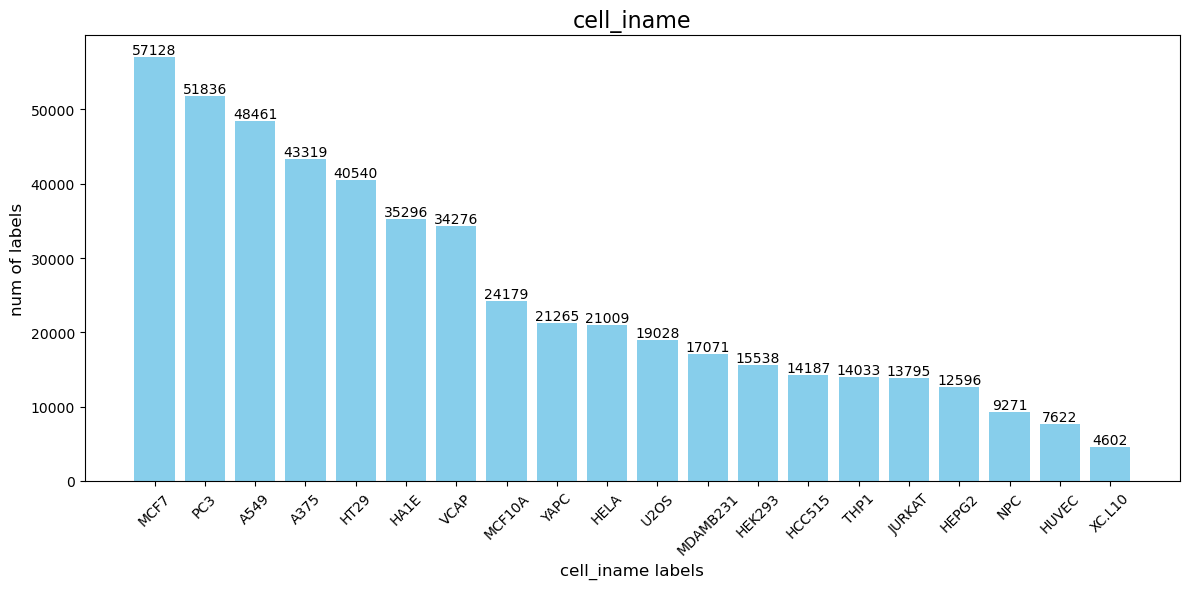

In [6]:
cell_iname = adata.obs['cell_iname'].value_counts()

# 设置图形尺寸
plt.figure(figsize=(12, 6))

# 绘制条形图
bars = plt.bar(cell_iname.index.astype(str), cell_iname.values, color='skyblue')

# 在每个柱上展示对应值
for bar in bars:
    yval = bar.get_height()  # 获取柱的高度
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# 添加标题和标签
plt.title('cell_iname', fontsize=16)  # 中文标题
plt.xlabel('cell_iname labels', fontsize=12)  # 中文 X 轴名称
plt.ylabel('num of labels', fontsize=12)  # 中文 Y 轴名称

# 显示图表
plt.xticks(rotation=45)  # 旋转 x 轴刻度标签以提高可读性
plt.tight_layout()
plt.show()

In [8]:
target = adata.obs['target'].value_counts()
adata.obs['target'].value_counts()

target
PSMB1     15507
EGFR       4942
ESR1       4789
PTGS1      4780
DRD2       4711
          ...  
PGRMC1        1
F2R           1
CDK6          1
TAAR1         1
NFKBIA        1
Name: count, Length: 643, dtype: int64

In [13]:
print(adata.obs['target'].value_counts().head(10))

target
PSMB1     15507
EGFR       4942
ESR1       4789
PTGS1      4780
DRD2       4711
GABRA1     3820
HRH1       3781
NR3C1      3462
MTOR       3417
CHRM1      3259
Name: count, dtype: int64


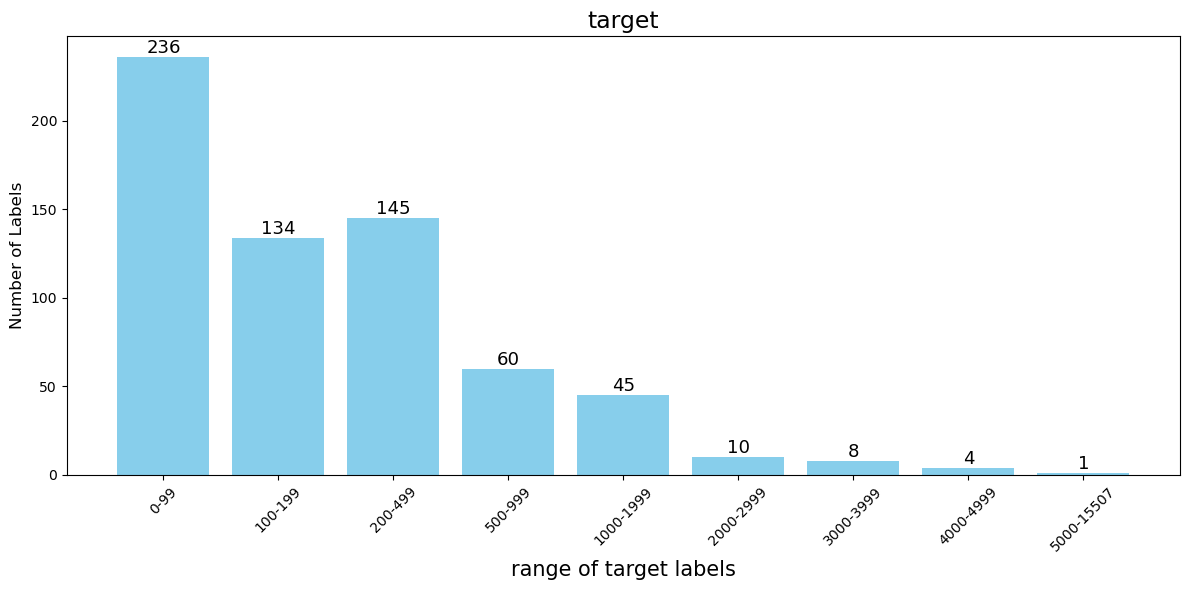

In [17]:

# 对 'cmap_name_x' 列进行统计
target_counts = adata.obs['target'].value_counts()
# 定义区间
bins = [0, 100,200, 500,1000, 2000, 3000, 4000, 5000, target_counts.max() + 1]  # 设定区间边界

# 使用 pandas 的 cut 函数将计数值分到区间
counts_binned = pd.cut(target_counts.values, bins=bins, right=False)

# 计算每个区间的计数
count_distribution = counts_binned.value_counts().sort_index()

# 动态生成标签
labels = [f"{int(bins[i])}-{int(bins[i + 1]) - 1}" for i in range(len(bins) - 1)]
#labels = ['1', '2','3','4', '5','6','7','8','9','10-49','50-99','100-499', '500-799', '800-1999', 'BRD-K50691590:6644', 'BRD-K60230970 :7506']

# 设置图形尺寸
plt.figure(figsize=(12, 6))

# 绘制条形图
bars = plt.bar(labels, count_distribution.values, color='skyblue')

# 在每个柱上展示对应值
for bar in bars:
    yval = bar.get_height()  # 获取柱的高度
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=13)


# 添加标题和标签
plt.title('target', fontsize=17)
plt.xlabel('range of target labels', fontsize=15)
plt.ylabel('Number of Labels', fontsize=12)

# 显示图表
plt.xticks(rotation=45)  # 旋转 x 轴刻度标签以提高可读性
plt.tight_layout()
plt.show()

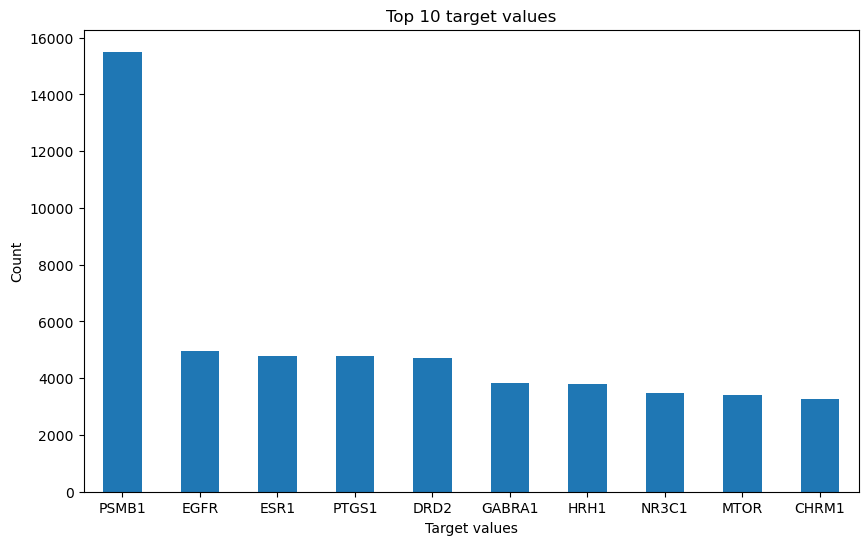

In [25]:
top_10_counts = adata.obs['target'].value_counts().head(10)

# 创建条形图
plt.figure(figsize=(10, 6))
top_10_counts.plot(kind='bar')

# 添加标题和标签
plt.title("Top 10 target values")
plt.xlabel("Target values", )
plt.xticks(rotation=0)
plt.ylabel("Count")

# 显示图像
plt.show()

In [19]:
moa = adata.obs['moa'].value_counts()
adata.obs['moa'].value_counts()

moa
Proteasome inhibitor                       15508
Dopamine receptor antagonist                6192
Phosphodiesterase inhibitor                 5699
HDAC inhibitor                              5688
Cyclooxygenase inhibitor                    5461
                                           ...  
Antifibrinolytic                               3
ATP citrase lyase inhibitor                    2
Dopamine receptor ligand                       1
Sigma receptor ligand                          1
Trace amine associated receptor agonist        1
Name: count, Length: 571, dtype: int64

In [20]:
print(adata.obs['moa'].value_counts().head(10))

moa
Proteasome inhibitor              15508
Dopamine receptor antagonist       6192
Phosphodiesterase inhibitor        5699
HDAC inhibitor                     5688
Cyclooxygenase inhibitor           5461
EGFR inhibitor                     5203
Histamine receptor antagonist      4548
KIT inhibitor                      4498
Adrenergic receptor antagonist     4393
MTOR inhibitor                     4181
Name: count, dtype: int64


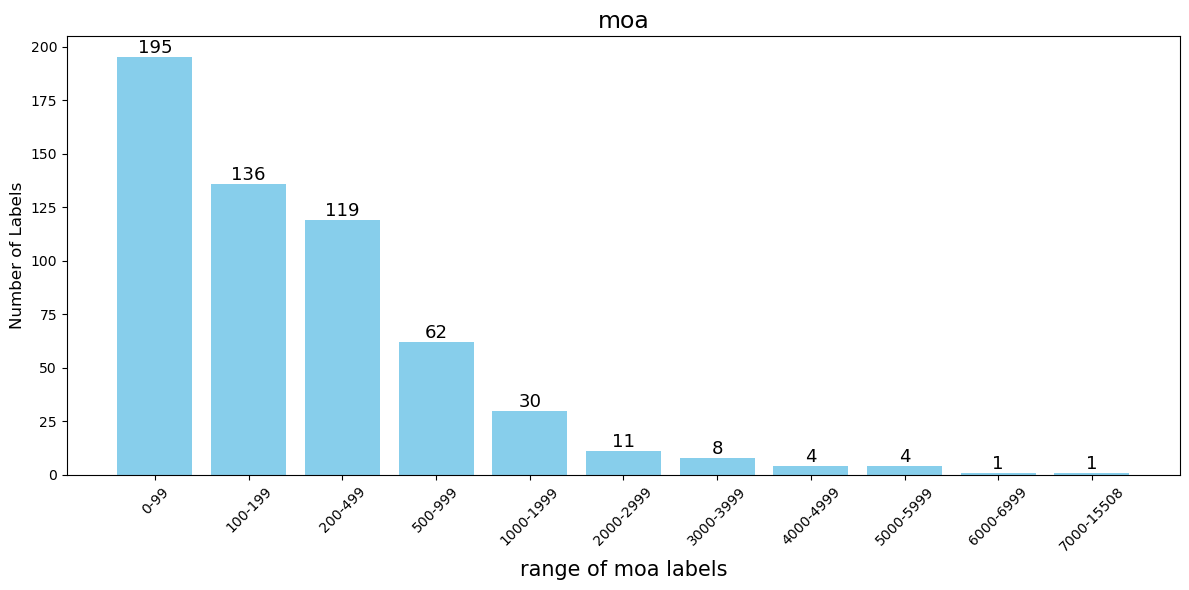

In [23]:

# 对 'cmap_name_x' 列进行统计
moa_counts = adata.obs['moa'].value_counts()
# 定义区间
bins = [0, 100,200, 500,1000, 2000, 3000, 4000, 5000, 6000, 7000,moa_counts.max() + 1]  # 设定区间边界

# 使用 pandas 的 cut 函数将计数值分到区间
counts_binned = pd.cut(moa_counts.values, bins=bins, right=False)

# 计算每个区间的计数
count_distribution = counts_binned.value_counts().sort_index()

# 动态生成标签
labels = [f"{int(bins[i])}-{int(bins[i + 1]) - 1}" for i in range(len(bins) - 1)]
#labels = ['1', '2','3','4', '5','6','7','8','9','10-49','50-99','100-499', '500-799', '800-1999', 'BRD-K50691590:6644', 'BRD-K60230970 :7506']

# 设置图形尺寸
plt.figure(figsize=(12, 6))

# 绘制条形图
bars = plt.bar(labels, count_distribution.values, color='skyblue')

# 在每个柱上展示对应值
for bar in bars:
    yval = bar.get_height()  # 获取柱的高度
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=13)


# 添加标题和标签
plt.title('moa', fontsize=17)
plt.xlabel('range of moa labels', fontsize=15)
plt.ylabel('Number of Labels', fontsize=12)

# 显示图表
plt.xticks(rotation=45)  # 旋转 x 轴刻度标签以提高可读性
plt.tight_layout()
plt.show()

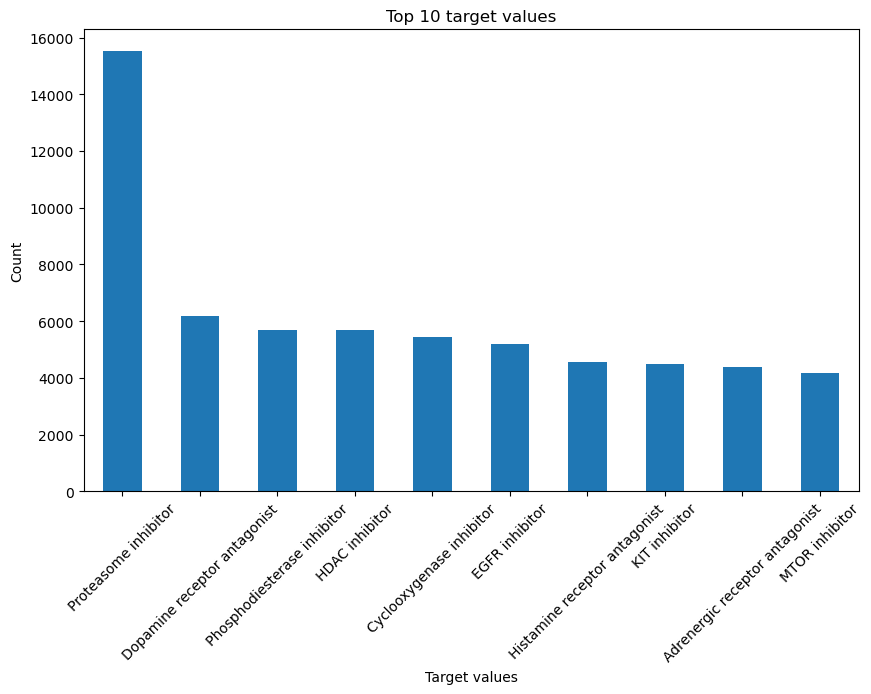

In [27]:
top_10_counts = adata.obs['moa'].value_counts().head(10)

# 创建条形图
plt.figure(figsize=(10, 6))
top_10_counts.plot(kind='bar')

# 添加标题和标签
plt.title("Top 10 target values")
plt.xlabel("Target values", )
plt.xticks(rotation=45)
plt.ylabel("Count")

# 显示图像
plt.show()